In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
X = np.linspace(-5.0,5.0, 100) # I got values -5 to +5

y = np.sqrt(10**2 - X**2)

y = np.hstack([y, -y])
x = np.hstack([X, -X])

In [3]:
X1 = np.linspace(-5.0,5.0, 100) # I got values -5 to +5

y1 = np.sqrt(5**2 - X1**2)

y1 = np.hstack([y1, -y1])
x1 = np.hstack([X1, -X1])

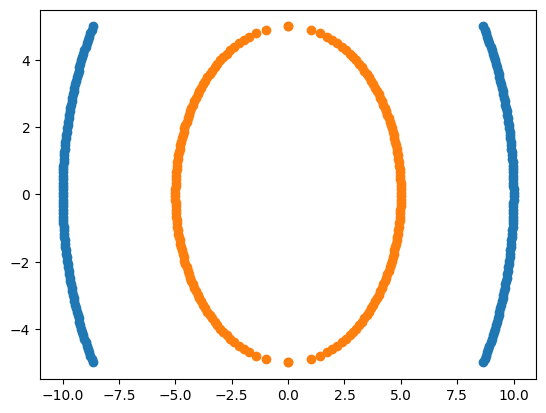

In [4]:
plt.scatter(y,x)
plt.scatter(y1,x1)

As per above Image, we not segregating the data in single line

#### So, we should use some short of the transformation techniques by using kernels.

In [5]:
# Creating DF1 for x and y
df1 = pd.DataFrame(np.vstack([y,x]).T, columns=["X1","X2"])

df1["Y"] = 0

In [6]:
# Creating DF2 for x and y
df2 = pd.DataFrame(np.vstack([y1,x1]).T, columns=["X1","X2"])

df2["Y"] = 1

In [7]:
df1

,X1,X2,Y
0,8.660254,-5.00000,0
1,8.717792,-4.89899,0
2,8.773790,-4.79798,0
3,8.828277,-4.69697,0
4,8.881281,-4.59596,0
...,...,...,...
195,-8.881281,-4.59596,0
196,-8.828277,-4.69697,0
197,-8.773790,-4.79798,0
198,-8.717792,-4.89899,0


In [8]:
df2

,X1,X2,Y
0,0.000000,-5.00000,1
1,0.999949,-4.89899,1
2,1.406908,-4.79798,1
3,1.714198,-4.69697,1
4,1.969049,-4.59596,1
...,...,...,...
195,-1.969049,-4.59596,1
196,-1.714198,-4.69697,1
197,-1.406908,-4.79798,1
198,-0.999949,-4.89899,1


#### Now concatenating the df1 and df2

In [9]:
df = df1.append(df2)

C:\Users\msant\AppData\Local\Temp\ipykernel_2996\281634162.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df1.append(df2)


In [10]:
df

,X1,X2,Y
0,8.660254,-5.00000,0
1,8.717792,-4.89899,0
2,8.773790,-4.79798,0
3,8.828277,-4.69697,0
4,8.881281,-4.59596,0
...,...,...,...
195,-1.969049,-4.59596,1
196,-1.714198,-4.69697,1
197,-1.406908,-4.79798,1
198,-0.999949,-4.89899,1


In [11]:
X = df.iloc[:, :2]
y = df.iloc[:,-1]

In [12]:
X

,X1,X2
0,8.660254,-5.00000
1,8.717792,-4.89899
2,8.773790,-4.79798
3,8.828277,-4.69697
4,8.881281,-4.59596
...,...,...
195,-1.969049,-4.59596
196,-1.714198,-4.69697
197,-1.406908,-4.79798
198,-0.999949,-4.89899


In [13]:
y

0      0
1      0
2      0
3      0
4      0
      ..
195    1
196    1
197    1
198    1
199    1
Name: Y, Length: 400, dtype: int64

In [14]:
#Train, Test data

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

In [15]:
# Model training

from sklearn.svm import SVC
model = SVC(kernel = "linear")
model.fit(X_train, y_train)


SVC(kernel='linear')

In [16]:
# Accuracy

from sklearn.metrics import accuracy_score
y_pred = model.predict(X_test)

accuracy_score(y_test, y_pred) # Very low accuracy, because of data is not linear separable

0.45

<Axes: xlabel='X1', ylabel='X2'>

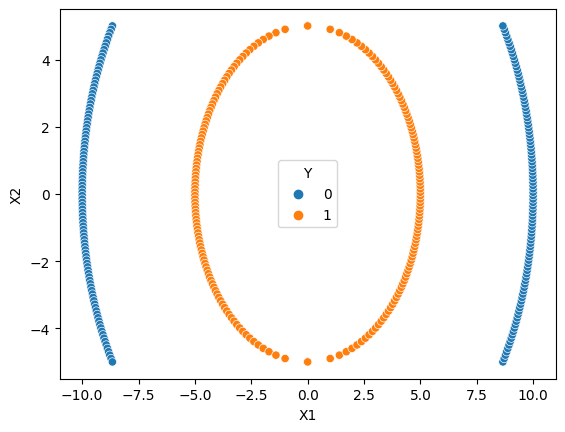

In [17]:
import seaborn as sns
sns.scatterplot(x=df["X1"], y=df["X2"], hue=df["Y"], data=df)

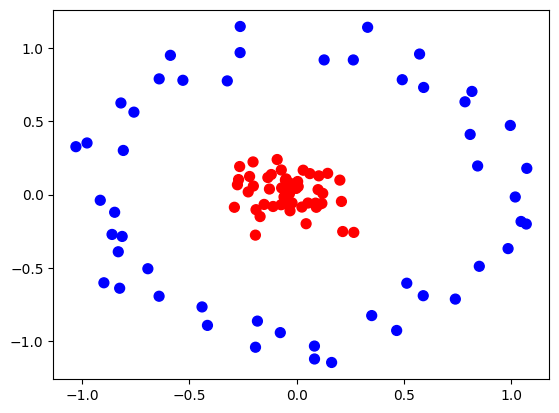

In [18]:
from sklearn.datasets import make_circles
X, y = make_circles(100, factor=0.1, noise=0.1)

plt.scatter(X[:,0], X[:,1], c=y, s=50, cmap="bwr")

We saw linear kernel, now instead of linear kernel, we will try with some other kernels.

In [19]:
# Model training with RBF kernel

from sklearn.svm import SVC
model1 = SVC(kernel = "rbf")
model1.fit(X_train, y_train)


SVC()

In [20]:
# Accuracy

from sklearn.metrics import accuracy_score
y_pred1 = model1.predict(X_test)

accuracy_score(y_test, y_pred1) # high accuracy, because of data is transformed

1.0

# Now we got 100% of accuracy, why? because internally the data was transformed with the help of rbf kernel.

Now check with polynomial kernel

In [21]:
# Model training with Poly kernel

from sklearn.svm import SVC
model2 = SVC(kernel = "poly")
model2.fit(X_train, y_train)


SVC(kernel='poly')

In [22]:
# Accuracy

from sklearn.metrics import accuracy_score
y_pred2 = model2.predict(X_test)

accuracy_score(y_test, y_pred2) # 59 accuracy, because of data is transformed

0.59

In [23]:
# After break

In [24]:
df["X1_square"] = df["X1"]**2
df["X2_square"] = df["X2"]**2

df["X1*X2"] = (df["X1"] * df["X2"])

In [25]:
df.head()

,X1,X2,Y,X1_square,X2_square,X1*X2
0,8.660254,-5.00000,0,75.000000,25.000000,-43.301270
1,8.717792,-4.89899,0,75.999898,24.000102,-42.708375
2,8.773790,-4.79798,0,76.979390,23.020610,-42.096467
3,8.828277,-4.69697,0,77.938476,22.061524,-41.466150
4,8.881281,-4.59596,0,78.877155,21.122845,-40.818009


In [26]:
X = df[["X1","X2","Y","X1_square","X2_square","X1*X2"]]
y=df.Y

In [27]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

In [28]:
X_train

,X1,X2,Y,X1_square,X2_square,X1*X2
50,4.999745,0.050505,1,24.997449,0.002551,0.252512
63,9.906589,1.363636,0,98.140496,1.859504,13.508984
112,-3.263736,3.787879,1,10.651974,14.348026,-12.362637
159,-9.953852,-0.959596,0,99.079176,0.920824,9.551676
83,3.680983,3.383838,1,13.549638,11.450362,12.455852
...,...,...,...,...,...,...
123,-4.223140,2.676768,1,17.834915,7.165085,-11.304366
192,-9.031653,-4.292929,0,81.570758,18.429242,38.772248
117,-9.445795,3.282828,0,89.223038,10.776962,-31.008922
47,9.996811,-0.252525,0,99.936231,0.063769,-2.524447


In [29]:
# Now I want to plot it
# That is a 3d plot
# So for that I am importing the plotly

import plotly.express as px
fig = px.scatter_3d(df, x="X1", y="X2", z="X1*X2", color="Y")
fig.show()

In [30]:
# Still we did not able to segregate the data
# So instead of X1, now I am taking X1 square 

In [31]:
fig = px.scatter_3d(df, x="X1_square", y="X2", z="X1*X2", color="Y")
fig.show() # Now we can able to easily segregate the data

In [32]:
# Now lets try to implement the svc on top of this new data (X1square .... ellam add panna data)

X_train

,X1,X2,Y,X1_square,X2_square,X1*X2
50,4.999745,0.050505,1,24.997449,0.002551,0.252512
63,9.906589,1.363636,0,98.140496,1.859504,13.508984
112,-3.263736,3.787879,1,10.651974,14.348026,-12.362637
159,-9.953852,-0.959596,0,99.079176,0.920824,9.551676
83,3.680983,3.383838,1,13.549638,11.450362,12.455852
...,...,...,...,...,...,...
123,-4.223140,2.676768,1,17.834915,7.165085,-11.304366
192,-9.031653,-4.292929,0,81.570758,18.429242,38.772248
117,-9.445795,3.282828,0,89.223038,10.776962,-31.008922
47,9.996811,-0.252525,0,99.936231,0.063769,-2.524447


In [33]:

# Model Building

from sklearn.svm import SVC
model3 = SVC(kernel="linear")
model3.fit(X_train, y_train)


SVC(kernel='linear')

In [34]:
y_pred3 = model3.predict(X_test)
accuracy_score(y_test, y_pred3)

1.0

# Why 100%?

    Because with the help of the (plotly la second ah print panna image) we can able to split with single line, that is a linearly separable, so for that we got a good accuracy, 

    Dataset size is very much short, so that we got 100% otherwise there is a possibility to do not get 100% acc

In [35]:
# Now we will do our model without x1square and x2square columns, because idha plotly la plot panni pathapa its not a linear seperable

In [36]:
df.columns

Index(['X1', 'X2', 'Y', 'X1_square', 'X2_square', 'X1*X2'], dtype='object')

In [39]:
X_train = X_train[['X1','X2','X1*X2']]
X_test = X_test[["X1", "X2", "X1*X2"]]

In [40]:
# Model Building

from sklearn.svm import SVC
model4 = SVC(kernel="linear")
model4.fit(X_train, y_train)

SVC(kernel='linear')

In [41]:
y_pred4 = model4.predict(X_test)
accuracy_score(y_test, y_pred4) #Less accuracy, thats why we should give linear separable columns

0.56

Try with all kernels, do hyperparameter tuning, you will get the best kernel parameter. (By using gridsearchcv, randomsearchcv)

                                                                    Completed